In [84]:
import random
import math
import time
from queue import *
import numpy as np
import matplotlib.pyplot as plt



world = np.zeros((8,8))
rewardGrid = np.full((8, 8), -0.04)
utilities = np.zeros(rewardGrid.shape)
rewardGrid[7][1] = 1
rewardGrid[0][7] = 5000

In [85]:
def policy(state, world, utilities, epsilon):
    actions = checkPossibleActions(state, world)
    actionReward = -1000000
    currentAction = None
    if random.random() < epsilon:
        return random.choice(actions)
    for action in actions:
        if utilities[action[0]][action[1]] >= actionReward:
            currentAction = action
            actionReward = utilities[action[0]][action[1]]
    if currentAction == None: return random.choice(actions)
    return currentAction

def checkPossibleActions(state, world):
    actions = []
    if state[0] -1 >= 0:
        if world[state[0]-1][state[1]] == 0: 
            actions.append([state[0]-1,state[1], "u"])
        
    if state[0] +1 <= len(world) -1:
        if world[state[0]+1][state[1]] == 0: 
            actions.append([state[0]+1,state[1], "d"])
        
    if state[1] -1 >= 0:
        if world[state[0]][state[1]-1] == 0: 
            actions.append([state[0],state[1]-1, "l"])
        
    if state[1] +1 <= len(world[0])-1:
        if world[state[0]][state[1]+1] == 0: 
            actions.append([state[0],state[1]+1, "r"])
    return actions
    

def printUtilities(matrix):
    for i in range(len(matrix)):
        print(np.around(matrix[i], decimals=4))

def learningAgent(initialPosition, world, rewardGrid, utilities, iterations=100000000, epsilon=0.1):
    ns = np.zeros(rewardGrid.shape)
    alpha = 0.0001
    gamma = 1
    state = initialPosition
    lastState = None
    count = 0
    steps = 0
    totalSteps = []
    stateQueue = Queue(maxsize=4)
    while True:
        epsilon = max(1 - (0.00001 * np.sum(totalSteps)), 0.05)
        steps += 1
        x = state[0]
        y = state[1]
        if ns[x][y] == 0:
            utilities[x][y] = rewardGrid[x][y]
        if lastState:
            lastX = lastState[0]
            lastY = lastState[1]
            ns[lastX][lastY] += 1
            alpha = 60/(59 + ns[lastX][lastY])
            queueCount = 1
            for i in range(stateQueue.qsize()):
                queuedState = stateQueue.get()
                #calculate with temp val
                qX = queuedState[0]
                qY = queuedState[1]
                utilities[qX][qY] += \
                                    (\
                                      alpha * \
                                      (\
                                          rewardGrid[qX][qY]\
                                          + gamma\
                                          * utilities[x][y]\
                                          - utilities[qX][qY]\
                                      )\
                                    )\
                                    / queueCount
                queueCount += queueCount
                #return all states but   the last one
                if stateQueue.qsize() < 3:
                    stateQueue.put(queuedState)
                pass

        stateQueue.put(state)    
        if rewardGrid[x][y] > 0:
            count += 1
            print("Reward:", rewardGrid[x][y])
            print("Win count:",count)
            print("Steps taken:",steps)
            print("Alpha: ",alpha)
            print("Epsilon: ", epsilon)
            printUtilities(utilities)
            totalSteps.append(steps)
            stateQueue.queue.clear()
            steps = 0
            if count != 1000:
                #initializing in initial position
#                 state = initialPosition
                #initializing in random state
                state = [random.randint(0,7), random.randint(0,7)]
                print("New Position: ", state)
                continue
            return totalSteps
        else:
            lastState = state
            action = policy(state, world, utilities, epsilon)
            state = [action[0], action[1]]
    return totalSteps
            
            
def evaluate(world, utilities, initialPosition, rewardGrid, iterations=1):
    moves = np.chararray(world.shape, unicode=True, itemsize=2)
    moves[:] = ' '
    state = initialPosition
    for i in range(len(utilities)):
        for j in range(len(utilities[i])):
            actions = checkPossibleActions([i, j], world)
            actionReward = -1000000
            for action in actions:
                if utilities[action[0]][action[1]] >= actionReward:
                    currentAction = action
                    moves[i][j] = action[2]
                    actionReward = utilities[action[0]][action[1]]
#     print(moves)
    results = np.chararray(world.shape, unicode=True, itemsize=2)
    for i in range(len(utilities)):
        for j in range(len(utilities[0])):
            state = [i,j]
            visited = [[i,j]]
            firstAction = policy(state, world, utilities, 0)
            results[i][j] = firstAction[2]
            while rewardGrid[state[0]][state[1]] <= 0:
                x = state[0]
                y = state[1]
                action = policy(state, world, utilities, 0)
                state = [action[0], action[1]]
                isVisited = False
#                 print(visited)
                for k in range(len(visited)):
                    if np.array_equal(visited[k], state):
                        isVisited = True
                if isVisited == False:
                    visited.append(state)
                    moves[x][y] = action[2]
                else:
                    print("continue", i, j)
                    results[i][j] = results[i][j] + "*"
                    break
    print(results)
        
    
    
    

Reward: 1.0
Win count: 1
Steps taken: 2
Alpha:  1.0
Epsilon:  1.0
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0.96 1.   0.   0.   0.   0.   0.   0.  ]
New Position:  [7, 1]
Reward: 1.0
Win count: 2
Steps taken: 1
Alpha:  0.9836065573770492
Epsilon:  0.99998
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0.96 1.   0.   0.   0.   0.   0.   0.  ]
New Position:  [5, 2]
Reward: 1.0
Win count: 3
Steps taken: 74
Alpha:  0.9375
Epsilon:  0.99997
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.     0.     0.     0.    -0.08  -0.085  0.     0.   ]
[ 0.      0.     -0.0805 -0.08   -0.08   -0.1257  0.      0.    ]
[ 0.      0.     -0.09   -0.08    0.     -0.081  -0.2043  0.    ]
[ 0.     -0.121

Reward: 5000.0
Win count: 31
Steps taken: 18
Alpha:  0.7142857142857143
Epsilon:  0.97903
[ 343.3222  304.5514  753.9542 1276.3818  677.1876 3959.8276 2932.1881
 5000.    ]
[ 270.5049  561.6135 1173.3789  695.9979  717.9601  464.0054 4140.9893
 3562.8891]
[ 425.1344  693.2677  775.245   643.0459  402.1898  726.631  2241.4477
 4543.6419]
[ 180.9471  332.9137  174.9823  222.4204  195.183  2418.7384 2397.561
 2899.5636]
[  72.2927  153.5467  290.763   188.3453  213.6986 2908.6616 2814.9274
 2752.0906]
[  74.8772  123.2315  152.5507  164.9943  124.4813  798.4079 2404.096
 2533.3876]
[  61.7898   91.9166  188.3684  112.2449  177.9886  710.4142 1555.045
  637.1805]
[ 42.6562   1.     168.4947 184.8638 161.4974 826.267  207.3106 703.7295]
New Position:  [7, 6]
Reward: 1.0
Win count: 32
Steps taken: 254
Alpha:  0.6818181818181818
Epsilon:  0.97885
[ 343.3222  763.8867  750.0534 1276.3818  677.1876 3984.2062 2932.1881
 5000.    ]
[ 361.7328  717.6859  571.657   506.0119 2778.4259 2689.9484 1200

Reward: 1.0
Win count: 55
Steps taken: 156
Alpha:  0.5607476635514018
Epsilon:  0.96297
[1320.0694 1415.6072 1389.6968 1772.9598 1856.7132 2514.8026 3450.6694
 5000.    ]
[1505.3175 1302.9587 1362.4595 1701.7984 1676.293  2987.4681 3376.2088
 4084.5679]
[1302.6638 1221.2171 1449.796  1382.0139 1581.3436 2098.2383 3612.7366
 4055.0309]
[1025.9264  851.09   1333.9929 2060.3522 1716.4627 1776.9923 4202.1467
 2067.2409]
[ 465.9853  630.8621 1192.7717 1171.7267 1076.4276  952.9014 1743.6082
 1763.3112]
[ 421.4234  311.2701  979.45    298.0474  737.6109 1173.7667  977.6206
 1090.4366]
[ 236.6101  380.3665  398.0617  480.2993  263.051   860.0932 1118.3698
 1766.5874]
[3.8697700e+01 1.0000000e+00 3.7882850e+02 2.2639120e+02 5.3683090e+02
 6.5083240e+02 1.3938617e+03 2.8817498e+03]
New Position:  [7, 0]
Reward: 1.0
Win count: 56
Steps taken: 2
Alpha:  0.7407407407407407
Epsilon:  0.96141
[1320.0694 1415.6072 1389.6968 1772.9598 1856.7132 2514.8026 3450.6694
 5000.    ]
[1505.3175 1302.9587 1362

[5.4757100e+02 1.0000000e+00 8.7308970e+02 7.7957600e+02 9.2660560e+02
 7.4954230e+02 1.3664675e+03 1.5377213e+03]
New Position:  [0, 4]
Reward: 5000.0
Win count: 76
Steps taken: 72
Alpha:  0.5217391304347826
Epsilon:  0.94766
[1637.7818 1741.7687 1980.3926 2160.6875 1875.2031 2352.3056 2148.8556
 5000.    ]
[1553.8923 1541.1215 1592.1346 2895.6148 1847.5859 2261.1203 2884.1785
 3178.46  ]
[1665.639  1537.1531 1569.1761 2250.2561 1764.1649 1884.2475 2291.8206
 4370.5698]
[1519.0989 1388.0047 1306.9246 1453.4749 1537.5618 1668.4127 2067.3513
 3671.4543]
[ 837.9862 1128.8788 1350.3644 1854.5527 1740.7314 2946.8648 2765.9857
 3006.9606]
[ 788.5069 1165.3802 1354.1096 1445.4496 1226.8647 1897.5438 1787.3535
 1339.1042]
[ 833.0759  980.3823  435.1283  826.8974  908.9823 1652.2694 1797.6365
 1528.1426]
[5.4757100e+02 1.0000000e+00 8.7308970e+02 7.7957600e+02 9.2660560e+02
 7.4954230e+02 1.3664675e+03 1.5377213e+03]
New Position:  [0, 4]
Reward: 5000.0
Win count: 77
Steps taken: 52
Alpha:  0.

[1930.806  2014.9406 1953.3713 2217.8906 2114.5915 3886.6407 3302.3753
 5000.    ]
[2048.2488 2007.0537 1926.3513 2167.8531 2210.2688 3097.8755 4086.3225
 3306.3806]
[1897.157  2049.299  1760.7254 1961.6421 2299.2858 2862.7843 2989.1202
 2886.4255]
[1858.4166 1891.3786 1721.9064 1842.2556 1866.5505 2736.3518 3587.2676
 2219.067 ]
[1771.0218 1448.6498 1843.1171 1916.7904 1827.7042 1998.311  1966.82
 2040.4379]
[1482.6764 1604.1046 1482.1141 1593.9484 1708.1916 2047.3198 2044.9562
 2243.1333]
[ 269.666   722.5789  549.8417 1618.9917 1673.9506 2051.6335 2091.9995
 2088.5425]
[5.8887810e+02 1.0000000e+00 1.3153809e+03 1.5299817e+03 1.7245391e+03
 1.9065213e+03 2.1270054e+03 1.9136891e+03]
New Position:  [1, 4]
Reward: 5000.0
Win count: 97
Steps taken: 27
Alpha:  0.410958904109589
Epsilon:  0.92897
[1930.806  2014.9406 1953.3713 2562.9647 3001.4055 3308.043  3104.2204
 5000.    ]
[2048.2488 2007.0537 1926.3513 2167.8531 3147.7188 3219.8888 4281.3558
 3306.3806]
[1897.157  2049.299  1760.725

Reward: 1.0
Win count: 120
Steps taken: 30
Alpha:  0.37267080745341613
Epsilon:  0.9147
[2475.4901 2948.5893 3194.4339 3432.9405 3489.8376 3372.5824 3444.1268
 5000.    ]
[2488.9308 2973.0518 2912.6536 3432.627  3343.8426 3221.5977 3244.2432
 3369.5462]
[2376.833  2240.7892 2631.7373 2821.3095 3181.5905 3053.0582 3062.0963
 3375.0892]
[2324.4925 1790.0716 2242.4263 2592.9313 2796.4581 2736.5667 2625.8361
 3493.1525]
[1615.8089 1669.9317 2189.7907 2507.3562 2537.3778 2706.2442 2785.6376
 3195.4389]
[1288.3643  862.4001 1633.6187 2131.2566 1940.4968 2273.8951 3076.7904
 2857.1865]
[ 545.2669  934.0834 1530.1283 1655.313  1230.1877 2016.1261 2590.361
 2774.9602]
[7.7976820e+02 1.0000000e+00 1.5171947e+03 1.3900378e+03 1.7347066e+03
 2.2982428e+03 2.1923642e+03 2.3628851e+03]
New Position:  [0, 6]
Reward: 1.0
Win count: 121
Steps taken: 21
Alpha:  0.36809815950920244
Epsilon:  0.9144
[2475.4901 2948.5893 3194.4339 3432.9405 3489.8376 3372.5824 3207.6418
 5000.    ]
[2488.9308 2973.0518 291

 3997.4394]
[2397.4839 2581.4031 2813.6334 2730.5503 2737.7909 3601.7624 3440.0765
 3537.3397]
[1937.7954 2413.4533 2266.9802 2434.6276 2767.3018 3151.4617 3533.8488
 3347.9638]
[1538.0591 1608.5526 1506.9406 2039.5543 2994.2833 2920.9495 2558.1312
 2990.3451]
[1792.1174 1546.5189 1785.6679 1935.7898 2493.8132 2175.0229 2500.9155
 2817.6158]
[1275.3122 1557.4378 1541.2548 2131.1441 2207.6462 2339.1856 2214.1476
 2677.9943]
[4.1882170e+02 1.0000000e+00 1.6558981e+03 1.4587451e+03 1.5567497e+03
 1.4184993e+03 2.4826910e+03 2.5891044e+03]
New Position:  [4, 6]
Reward: 5000.0
Win count: 146
Steps taken: 20
Alpha:  0.3314917127071823
Epsilon:  0.90247
[2643.0756 2584.0666 2959.7814 3010.371  3834.116  4550.9052 3595.3249
 5000.    ]
[2396.248  2693.1481 2761.21   3133.6024 3923.6607 3771.3053 3542.7969
 3807.4908]
[2397.4839 2581.4031 2813.6334 2730.5503 2737.7909 4003.9766 3743.1013
 3658.2004]
[1937.7954 2413.4533 2266.9802 2434.6276 2767.3018 3151.4617 3518.141
 3347.9638]
[1538.0591 160

Steps taken: 87
Alpha:  0.28846153846153844
Epsilon:  0.88881
[2777.5558 2672.9841 3507.4675 3611.1008 3481.6808 3783.3236 3964.0858
 5000.    ]
[2578.164  3057.1095 3437.1461 3518.284  3520.9645 3621.7005 4143.0171
 3818.643 ]
[2408.6742 3111.5584 3067.0536 3346.8284 3285.4563 3532.055  3778.4032
 3841.6136]
[2430.25   2716.0196 2626.0103 2848.9286 3375.4574 3674.0749 3851.8298
 3705.8142]
[1923.8364 2072.1195 2408.8162 2533.6339 2534.3497 2870.4834 3368.7772
 3761.6806]
[1657.9188  753.9523 2513.8643 2773.0635 3260.2595 3330.142  3481.8762
 3434.2538]
[ 636.0407 1232.4437 1404.9974 2591.8067 2939.1022 2611.3738 2504.1501
 2532.7243]
[9.8041680e+02 1.0000000e+00 1.4543742e+03 1.2765953e+03 2.0516224e+03
 2.4340941e+03 2.6074173e+03 2.5013756e+03]
New Position:  [0, 6]
Reward: 5000.0
Win count: 167
Steps taken: 112
Alpha:  0.2830188679245283
Epsilon:  0.88794
[2777.5558 2672.9841 3589.7146 4018.7241 3717.747  3867.199  3758.2735
 5000.    ]
[2578.164  3057.1095 3565.537  3510.0348 3520

 3801.3394]
[2238.8501 2659.0491 3029.7802 3237.4376 3242.9435 3415.9041 3807.8491
 3935.1204]
[2411.9962 2875.2163 2934.2235 3136.9319 3398.5445 3554.0858 3697.4346
 3681.832 ]
[1919.6899 2540.4204 2448.5681 2775.3042 3257.9815 3237.9067 3421.3265
 3427.3723]
[1558.3916 1890.9525 2388.4096 2918.6128 3197.3854 3153.7884 3233.8424
 3434.0467]
[1757.4387 2237.1508 2575.3903 2879.0386 3021.4503 3130.0783 3103.3692
 3192.0225]
[8.6762220e+02 1.0000000e+00 2.2865263e+03 2.4845232e+03 2.2783001e+03
 2.8601823e+03 3.0180096e+03 3.1001084e+03]
New Position:  [3, 1]
Reward: 5000.0
Win count: 189
Steps taken: 16
Alpha:  0.25316455696202533
Epsilon:  0.87098
[2757.8599 2580.666  2830.804  3347.4707 3453.039  3538.9892 4006.6934
 5000.    ]
[2800.3328 2455.3664 2970.8705 3395.7192 4070.547  3814.9129 4251.3177
 3839.2704]
[2238.8501 2659.0491 3194.2168 3517.167  3192.25   3415.9041 3807.8491
 3935.1204]
[2411.9962 3033.8496 3071.1213 3180.5765 3332.422  3554.0858 3697.4346
 3681.832 ]
[1919.6899 2

 3697.2057]
[1798.2247 2359.2699 2687.4715 3116.1741 3427.285  3457.8124 3552.9935
 3508.5724]
[1324.7139 1867.2373 1723.8095 2847.5817 3375.7785 3425.3301 3476.1267
 3410.7718]
[1.2484631e+03 1.0000000e+00 2.4060018e+03 2.8491251e+03 3.2049040e+03
 3.2107710e+03 3.3363129e+03 3.5064350e+03]
New Position:  [6, 0]
Reward: 5000.0
Win count: 208
Steps taken: 28
Alpha:  0.2158273381294964
Epsilon:  0.85826
[3026.4068 3325.636  3334.0824 3599.0664 3714.1559 3669.7452 3781.302
 5000.    ]
[2649.4988 2833.728  3259.862  3308.7606 3427.416  3560.8576 3912.7274
 4018.6502]
[2871.2438 3140.0533 3300.7161 3542.6532 3580.4495 3831.298  4199.6255
 4276.6293]
[2767.7289 2867.5606 3061.3874 3141.0562 3372.1566 3936.5398 4111.2176
 3724.0403]
[2657.5796 2794.8951 2863.8575 3204.8045 3483.6043 3726.9414 3796.6554
 3697.2057]
[1798.2247 2497.1699 2835.5798 3116.1741 3611.9874 3636.3232 3552.9935
 3508.5724]
[1965.5499 2106.7631 2429.8228 3023.3568 3393.5754 3425.3301 3476.1267
 3410.7718]
[1.2484631e+03

Reward: 1.0
Win count: 228
Steps taken: 117
Alpha:  0.2777777777777778
Epsilon:  0.84707
[3109.2165 3274.3616 3382.0295 3419.3991 3705.9498 3926.3407 4183.826
 5000.    ]
[2940.6192 3189.864  3454.6238 3556.5007 3968.9714 3804.7347 4160.7706
 4107.0188]
[2978.0985 2787.6678 3231.552  3471.0202 3626.4446 3823.5182 3937.1238
 3973.7618]
[2964.9931 3061.9529 3585.0897 3671.9565 3789.5844 3836.1585 3934.6983
 3972.6398]
[2657.5796 3035.6209 3343.9577 3648.8808 3725.7139 3765.8589 3755.4364
 3774.2903]
[1798.2247 2881.8305 3228.2289 3443.1906 3527.2083 3645.529  3755.794
 3790.3409]
[1408.5547 2312.4462 3246.6297 2916.4935 2522.9096 3464.5741 3560.4256
 3700.3587]
[1.2484631e+03 1.0000000e+00 3.0143275e+03 3.0589934e+03 3.5333139e+03
 3.6371595e+03 3.6605805e+03 3.6784499e+03]
New Position:  [7, 7]
Reward: 5000.0
Win count: 229
Steps taken: 24
Alpha:  0.2247191011235955
Epsilon:  0.8459
[3109.2165 3274.3616 3382.0295 3419.3991 3705.9498 3926.3407 4206.7511
 5000.    ]
[2940.6192 3189.864  3

Win count: 241
Steps taken: 161
Alpha:  0.18181818181818182
Epsilon:  0.8391
[3442.5774 3613.9758 3693.9367 3862.2939 3831.883  4180.6389 4318.4485
 5000.    ]
[3515.7513 3527.4295 3574.5932 3858.8334 3938.1209 4364.0374 4383.8657
 4387.8074]
[3459.0618 3457.9002 3479.0898 3709.4775 3929.235  4229.7364 4238.5936
 4465.2571]
[3455.5463 3415.1202 3433.2349 3626.4728 3697.142  3890.7906 4130.4615
 4184.2332]
[2979.6328 3173.5509 3298.159  3287.8852 3567.649  3555.5944 3640.351
 3778.1177]
[2658.5577 3016.0745 2989.3628 3107.3227 3592.7546 3589.3672 3662.5365
 3740.6572]
[1784.3061 1897.344  2355.3168 3266.0006 3423.7718 3460.0478 3476.7197
 3546.998 ]
[1.2484631e+03 1.0000000e+00 3.0475375e+03 3.3545266e+03 3.4676731e+03
 3.4780326e+03 3.4596023e+03 3.4448229e+03]
New Position:  [5, 0]
Reward: 5000.0
Win count: 242
Steps taken: 139
Alpha:  0.18072289156626506
Epsilon:  0.83749
[3571.5972 3616.7848 3748.2247 3990.6338 4068.087  4212.474  4321.7352
 5000.    ]
[3587.8185 3476.6171 3664.0345

Reward: 5000.0
Win count: 266
Steps taken: 54
Alpha:  0.16129032258064516
Epsilon:  0.8295399999999999
[3925.4409 4069.0375 4192.1363 4499.5864 4456.5171 4525.7804 4552.1994
 5000.    ]
[3851.0893 3810.5925 4241.144  4351.1369 4525.9841 4516.0019 4737.0401
 4690.6913]
[3701.0832 3788.2966 4205.3987 4300.0983 4274.8747 4402.437  4540.383
 4620.9872]
[3628.9409 3633.3093 4068.3743 4138.4253 3951.7675 4273.417  4298.1182
 4393.2132]
[3353.7549 3316.8936 3498.2964 3936.3641 4086.5279 4211.8092 4180.2792
 4321.6208]
[3151.3518 3310.6388 2988.1669 3478.9318 3653.9899 3730.0391 4037.8775
 3952.4952]
[2385.487  3190.2029 3170.2328 3553.772  3360.0916 3513.1165 3693.1831
 3667.444 ]
[2.3648618e+03 1.0000000e+00 3.0475375e+03 3.3486654e+03 3.4676731e+03
 3.5333922e+03 3.6503245e+03 3.6348738e+03]
New Position:  [4, 5]
Reward: 5000.0
Win count: 267
Steps taken: 23
Alpha:  0.1595744680851064
Epsilon:  0.829
[3925.4409 4069.0375 4192.1363 4499.5864 4456.5171 4525.7804 4552.1994
 5000.    ]
[3851.08

Reward: 5000.0
Win count: 291
Steps taken: 20
Alpha:  0.1466992665036675
Epsilon:  0.8184199999999999
[4114.4478 4109.5576 4171.7427 4307.2647 4431.8306 4555.7356 4605.4756
 5000.    ]
[4090.9508 3973.3085 4156.0512 4231.1846 4376.6512 4593.0664 4691.9003
 4638.2305]
[3992.8608 3961.2837 4104.3516 4253.3899 4431.139  4571.4223 4678.4477
 4681.0521]
[3973.0271 3738.7083 4073.3102 4033.8556 4255.2302 4189.3163 4656.5935
 4596.5933]
[3751.1996 3499.6325 3849.3028 4015.2653 4073.998  4234.1414 4511.9908
 4533.986 ]
[3412.1104 3372.4588 3575.6785 3870.2135 4025.3441 3928.7332 4382.9214
 4384.2242]
[3444.4618 3159.5474 3210.0657 3726.5569 3872.3989 3749.1955 4064.8692
 4224.6977]
[2.9981210e+03 1.0000000e+00 3.3679441e+03 3.4363800e+03 3.6260588e+03
 3.6567925e+03 3.9586094e+03 4.2186261e+03]
New Position:  [2, 5]
Reward: 5000.0
Win count: 292
Steps taken: 7
Alpha:  0.1791044776119403
Epsilon:  0.81822
[4114.4478 4109.5576 4171.7427 4307.2647 4431.8306 4576.7638 4614.3073
 5000.    ]
[4090.9

Reward: 5000.0
Win count: 316
Steps taken: 136
Alpha:  0.16759776536312848
Epsilon:  0.80853
[4337.4677 4346.3678 4334.8022 4412.0193 4506.0999 4721.5669 4705.9533
 5000.    ]
[4278.2459 4253.5296 4319.7256 4420.7398 4520.8827 4560.8895 4830.4514
 4781.    ]
[4152.8123 4232.9458 4141.861  4260.9704 4444.084  4590.6982 4708.9202
 4756.4235]
[3899.2871 4067.3479 4241.442  4213.6934 4266.928  4556.0572 4634.1425
 4660.9432]
[3682.6456 3372.2859 3408.8535 4170.7842 4198.9241 4387.2436 4515.9447
 4528.4801]
[3574.7747 3649.4637 3741.6672 3765.0784 3995.1484 4219.7109 4433.2003
 4386.4969]
[3444.4618 3665.5658 3629.2174 3722.788  4063.9186 4129.9991 4273.1031
 4332.9288]
[2.9981210e+03 1.0000000e+00 3.6302604e+03 2.9410319e+03 4.0421151e+03
 4.0663966e+03 4.0271694e+03 4.1706214e+03]
New Position:  [1, 3]
Reward: 5000.0
Win count: 317
Steps taken: 58
Alpha:  0.13157894736842105
Epsilon:  0.8071699999999999
[4337.4677 4346.3678 4345.4061 4431.8364 4572.3491 4677.4527 4705.9533
 5000.    ]
[42

Reward: 1.0
Win count: 341
Steps taken: 27
Alpha:  0.26200873362445415
Epsilon:  0.79732
[4401.4914 4505.6644 4317.6999 4552.4706 4662.013  4700.073  4706.2531
 5000.    ]
[4327.447  4485.6862 4402.1116 4584.8816 4604.8591 4614.0272 4677.632
 4640.7969]
[3823.7459 4271.927  4370.5006 4498.3749 4469.8401 4659.9265 4627.1093
 4633.9834]
[3191.9515 3445.978  4166.7112 4284.8776 4392.8945 4560.5388 4595.4421
 4563.6624]
[2766.818  3392.6927 2991.1633 4318.9154 4376.1328 4510.2955 4543.8203
 4486.1482]
[2882.282  3372.0431 3704.0468 3977.4802 4099.9316 4356.1287 4494.9487
 4445.614 ]
[2992.6745 3524.8285 3639.5832 3890.0615 4077.1163 4339.1578 4413.4156
 4287.6769]
[2.8092243e+03 1.0000000e+00 3.6814763e+03 3.5126368e+03 4.0478844e+03
 4.0850563e+03 4.1472387e+03 4.0428799e+03]
New Position:  [1, 2]
Reward: 5000.0
Win count: 342
Steps taken: 29
Alpha:  0.12738853503184713
Epsilon:  0.79705
[4401.4914 4505.6644 4385.8132 4611.0408 4648.6878 4707.8277 4683.4337
 5000.    ]
[4327.447  4485.686

New Position:  [0, 7]
Reward: 5000.0
Win count: 366
Steps taken: 1
Alpha:  0.12121212121212122
Epsilon:  0.78566
[4508.9261 4549.7355 4588.4267 4627.4204 4641.4167 4726.4398 4714.8902
 5000.    ]
[4486.5036 4560.9245 4594.6619 4603.5869 4656.2079 4640.0386 4648.9415
 4686.7676]
[4371.3928 4493.8267 4428.8536 4362.3429 4612.5224 4700.2367 4681.1862
 4691.7975]
[4148.2531 4144.3862 4131.1803 4331.0322 4537.845  4579.7367 4581.7669
 4636.5252]
[2766.818  3911.5799 4016.7501 4139.0831 4112.2398 4226.9746 4465.9939
 4543.8309]
[2585.6541 3940.3335 4038.5878 4053.5627 3988.7324 4195.9517 4420.7752
 4383.8367]
[2466.808  3717.1843 3641.2281 3917.7755 3989.1034 4129.8398 4299.3769
 4327.9979]
[2.8092243e+03 1.0000000e+00 3.6857542e+03 4.0217523e+03 4.0759086e+03
 3.9921419e+03 4.2017554e+03 4.0821422e+03]
New Position:  [1, 6]
Reward: 5000.0
Win count: 367
Steps taken: 19
Alpha:  0.13071895424836602
Epsilon:  0.78565
[4508.9261 4549.7355 4604.137  4646.4102 4648.5917 4697.9941 4705.0715
 5000.

New Position:  [5, 2]
Reward: 1.0
Win count: 391
Steps taken: 4
Alpha:  0.24691358024691357
Epsilon:  0.77442
[4472.8966 4529.2854 4544.5918 4636.1703 4696.6622 4753.0436 4711.1008
 5000.    ]
[4373.8208 4484.6712 4529.504  4625.7613 4683.5041 4678.8919 4694.6505
 4665.6188]
[4332.1529 4456.3468 4500.9859 4508.596  4635.7565 4626.9751 4659.6514
 4644.9571]
[4285.1727 4303.7598 4327.4249 4257.554  4524.0328 4551.8321 4693.5554
 4611.9516]
[4266.989  4176.0678 4107.2185 4268.8814 4518.8004 4454.7692 4568.1798
 4511.4695]
[3844.7385 3855.4585 2777.8297 4274.3134 4360.3847 4333.8611 4395.2033
 4294.5659]
[3453.8879 3151.3715 2708.0957 4047.4718 4271.7311 4327.5863 4342.6626
 4326.1222]
[3.4935957e+03 1.0000000e+00 3.6857542e+03 4.0217523e+03 4.0759086e+03
 4.2063478e+03 4.2780458e+03 4.2084133e+03]
New Position:  [3, 7]
Reward: 5000.0
Win count: 392
Steps taken: 14
Alpha:  0.11673151750972763
Epsilon:  0.77438
[4472.8966 4529.2854 4544.5918 4636.1703 4715.5748 4759.5848 4715.3156
 5000.   

New Position:  [1, 1]
Reward: 5000.0
Win count: 416
Steps taken: 36
Alpha:  0.1056338028169014
Epsilon:  0.76417
[4494.9802 4547.8904 4599.6028 4653.4845 4711.5864 4749.1795 4777.615
 5000.    ]
[4461.7071 4498.7998 4538.9437 4661.2444 4736.1739 4703.898  4745.4608
 4731.3696]
[4410.3186 4530.437  4573.9393 4644.8318 4673.7346 4671.2093 4673.7739
 4752.3673]
[4297.2342 4465.8864 4503.6354 4584.898  4629.3305 4645.0477 4632.4921
 4675.145 ]
[4401.6063 4379.2799 4357.7694 4446.1577 4611.2262 4563.2468 4591.5875
 4570.694 ]
[3844.7385 4073.0519 3968.1048 4324.6522 4372.7992 4455.6816 4497.3222
 4517.4243]
[3453.8879 3151.3715 3825.412  3966.3088 4298.3365 4436.5194 4393.6138
 4429.8464]
[3.4935957e+03 1.0000000e+00 3.6857542e+03 4.1336680e+03 4.1755450e+03
 4.3134907e+03 4.2849592e+03 4.3118421e+03]
New Position:  [2, 0]
Reward: 5000.0
Win count: 417
Steps taken: 88
Alpha:  0.10471204188481675
Epsilon:  0.76381
[4542.9983 4581.6335 4597.0318 4646.6171 4724.1549 4743.0416 4741.2818
 5000. 

New Position:  [3, 4]
Reward: 5000.0
Win count: 441
Steps taken: 11
Alpha:  0.10380622837370242
Epsilon:  0.75596
[4581.0991 4588.6181 4610.2604 4677.1258 4741.2668 4749.3621 4757.7186
 5000.    ]
[4561.807  4573.9428 4613.9257 4688.5683 4762.5258 4750.6319 4818.5944
 4825.0712]
[4538.4096 4529.4546 4543.719  4658.4453 4603.3841 4732.1814 4739.1958
 4781.121 ]
[4509.5224 4495.7238 4513.2114 4495.8612 4579.6065 4605.5086 4770.0358
 4696.1585]
[4401.6063 4381.705  4458.3144 4420.8845 4592.3106 4599.4378 4710.3693
 4701.7603]
[4120.7034 4165.8417 4394.1975 4352.5173 4476.2153 4488.5596 4565.0579
 4644.8967]
[3710.3962 3414.1668 4127.1391 4301.3412 4449.2364 4515.1633 4550.3123
 4553.37  ]
[3.4935957e+03 1.0000000e+00 3.6857542e+03 4.1802753e+03 4.1755450e+03
 4.3134907e+03 4.3351970e+03 4.3118421e+03]
New Position:  [7, 2]
Reward: 5000.0
Win count: 442
Steps taken: 45
Alpha:  0.10344827586206896
Epsilon:  0.7558499999999999
[4581.0991 4588.6181 4610.2604 4677.1258 4741.2668 4749.3621 4757

 4.4075047e+03 4.5594165e+03 4.3718772e+03]
New Position:  [5, 6]
Reward: 5000.0
Win count: 466
Steps taken: 61
Alpha:  0.09331259720062209
Epsilon:  0.7475099999999999
[4612.6628 4625.0162 4661.04   4731.9912 4757.7887 4826.6274 4822.6464
 5000.    ]
[4594.2687 4610.2492 4668.247  4716.4401 4804.145  4807.1035 4791.7807
 4761.2721]
[4568.9451 4601.1209 4620.9795 4661.2594 4734.6181 4781.5258 4781.4463
 4796.7347]
[4504.9394 4498.832  4565.0169 4590.2466 4680.453  4692.511  4726.2846
 4739.7791]
[4453.0817 4409.7073 4532.284  4559.5655 4560.996  4647.4355 4675.6495
 4715.066 ]
[4297.7542 4280.3914 4443.339  4342.3197 4480.4604 4563.7989 4628.5448
 4586.9004]
[3710.3962 3414.1668 4239.3168 4272.4122 4428.052  4468.4299 4612.2202
 4563.1753]
[3.4935957e+03 1.0000000e+00 4.1273585e+03 3.0097269e+03 3.7309819e+03
 4.4215192e+03 4.5446094e+03 4.4481153e+03]
New Position:  [1, 6]
Reward: 5000.0
Win count: 467
Steps taken: 3
Alpha:  0.09302325581395349
Epsilon:  0.7468999999999999
[4612.6628 

Steps taken: 4
Alpha:  0.23904382470119523
Epsilon:  0.73739
[4672.1533 4696.1289 4696.8138 4760.2401 4798.4137 4817.2974 4829.3242
 5000.    ]
[4646.3817 4679.4108 4722.7898 4795.094  4830.5931 4804.7386 4826.2315
 4781.922 ]
[4390.9324 4645.9442 4676.1187 4765.5609 4762.8555 4798.7652 4764.1125
 4718.7885]
[4403.5993 4638.0721 4643.5069 4717.0705 4733.9478 4745.969  4773.326
 4696.4506]
[4496.5571 4565.7892 4588.0347 4685.2177 4677.909  4717.2005 4753.2375
 4655.2147]
[4418.8541 4345.6522 4514.906  4431.8272 4579.8555 4314.5495 4591.0151
 4589.3452]
[3725.6322 2603.9456 4239.3168 4343.3411 4532.854  4273.3252 4446.0002
 4498.0575]
[3.4935957e+03 1.0000000e+00 4.1273585e+03 3.7030428e+03 4.3622295e+03
 4.3025057e+03 4.3149326e+03 4.2867032e+03]
New Position:  [2, 6]
Reward: 5000.0
Win count: 496
Steps taken: 14
Alpha:  0.08426966292134831
Epsilon:  0.73735
[4672.1533 4696.1289 4696.8138 4760.2401 4798.4137 4833.5523 4826.0875
 5000.    ]
[4646.3817 4679.4108 4722.7898 4795.094  4830.5

 4679.7719]
[4.0829672e+03 1.0000000e+00 4.1915067e+03 4.1505039e+03 4.4349242e+03
 4.3636479e+03 4.4497210e+03 4.4637600e+03]
New Position:  [7, 5]
Reward: 5000.0
Win count: 525
Steps taken: 20
Alpha:  0.09273570324574962
Epsilon:  0.7290099999999999
[4715.283  4752.0519 4756.5885 4800.5572 4817.9537 4830.1625 4839.3146
 5000.    ]
[4674.1008 4694.0515 4751.9381 4796.4744 4838.5223 4826.0228 4857.5755
 4834.8036]
[4521.4353 4664.3384 4663.2643 4694.1796 4805.8216 4822.4517 4786.719
 4805.7892]
[4456.573  4590.5601 4610.9099 4670.6907 4750.3738 4782.6214 4788.5979
 4803.5741]
[4400.5971 4414.2128 4504.436  4645.5727 4727.4941 4658.8463 4665.4341
 4759.4662]
[3874.1128 3434.6474 4504.0816 4275.7929 4554.8836 4507.613  4617.6689
 4712.0644]
[4122.2949 3257.3484 4224.3786 4251.7167 4413.9744 4377.7857 4538.415
 4645.7752]
[4.0829672e+03 1.0000000e+00 4.1915067e+03 4.1505039e+03 4.4349242e+03
 4.4243174e+03 4.5113491e+03 4.4637600e+03]
New Position:  [2, 4]
Reward: 5000.0
Win count: 526
St

 4857.556 ]
[4671.0676 4716.954  4772.5482 4783.285  4823.1422 4835.7081 4850.9561
 4869.4966]
[4630.3146 4624.1949 4713.3205 4800.5433 4778.0976 4770.675  4831.9371
 4836.6882]
[4567.6324 4532.6142 4641.8747 4748.7104 4683.3161 4724.7761 4786.7576
 4787.6419]
[4445.1073 4055.0159 4575.6937 4430.7831 4677.3722 4618.3043 4747.7729
 4781.4502]
[4413.0215 4010.0082 4203.1229 4313.8022 4562.9016 4543.7113 4499.2351
 4714.2711]
[4.1737520e+03 1.0000000e+00 3.1525282e+03 4.2271978e+03 4.5001411e+03
 4.4634980e+03 4.5991241e+03 4.6065728e+03]
New Position:  [0, 6]
Reward: 5000.0
Win count: 557
Steps taken: 86
Alpha:  0.07272727272727272
Epsilon:  0.72012
[4691.3049 4762.603  4784.4797 4860.2351 4862.1257 4878.1247 4867.0367
 5000.    ]
[4700.453  4731.6091 4806.6035 4844.7926 4862.5838 4850.0769 4865.3447
 4857.556 ]
[4672.496  4718.0454 4770.7775 4760.5963 4802.3598 4826.5971 4847.0717
 4867.1915]
[4630.3146 4624.1949 4647.8693 4667.558  4782.0123 4791.417  4839.5183
 4839.449 ]
[4567.6324 4

 4805.9867]
[4586.5559 4534.0936 4593.3278 4552.9654 4715.6845 4669.7759 4810.7481
 4813.3092]
[4276.2936 2982.2676 4392.6863 4538.3088 4631.0023 4625.2665 4567.1198
 4784.6268]
[4.1737520e+03 1.0000000e+00 3.8952368e+03 4.2271978e+03 4.5433659e+03
 4.5545458e+03 4.6676797e+03 4.6536966e+03]
New Position:  [2, 6]
Reward: 5000.0
Win count: 584
Steps taken: 8
Alpha:  0.06841505131128849
Epsilon:  0.7112799999999999
[4761.0878 4779.2177 4840.4964 4869.5946 4867.2026 4889.9496 4901.7388
 5000.    ]
[4782.5332 4788.326  4818.1935 4850.2401 4857.1776 4877.3699 4914.1649
 4881.3609]
[4746.6371 4735.0679 4752.6817 4814.4913 4847.4579 4880.9118 4886.5691
 4882.0943]
[4695.1533 4714.3792 4735.8656 4745.4145 4834.1991 4854.0078 4870.0716
 4851.5113]
[4670.2758 4550.3118 4670.0756 4715.2833 4773.0725 4821.6292 4793.5851
 4805.9867]
[4586.5559 4534.0936 4593.3278 4552.9654 4715.6845 4669.7759 4810.7481
 4813.3092]
[4276.2936 2982.2676 4392.6863 4538.3088 4631.0023 4625.2665 4567.1198
 4784.6268]
[4

Reward: 5000.0
Win count: 615
Steps taken: 50
Alpha:  0.06349206349206349
Epsilon:  0.70388
[4814.9688 4855.668  4878.9608 4891.0439 4897.1651 4903.6553 4903.8629
 5000.    ]
[4806.5757 4830.0413 4861.949  4867.0832 4898.9267 4894.1542 4897.424
 4898.3245]
[4766.4186 4753.4916 4798.0419 4858.229  4855.0642 4887.1935 4887.6123
 4908.2082]
[4695.1533 4760.541  4793.9925 4775.218  4769.7507 4864.1873 4871.0497
 4874.002 ]
[4715.2273 4726.7661 4696.9525 4727.3773 4790.4924 4835.9788 4835.5157
 4853.7657]
[4551.7382 3801.9395 4622.3602 4687.8702 4742.4309 4755.2433 4839.3185
 4824.1893]
[4408.2688 2774.4655 4149.2713 4627.4824 4728.1597 4709.2312 4657.4964
 4788.9264]
[4.1737520e+03 1.0000000e+00 3.8952368e+03 4.4707411e+03 4.6362588e+03
 4.6265220e+03 4.6845165e+03 4.7684563e+03]
New Position:  [2, 0]
Reward: 5000.0
Win count: 616
Steps taken: 26
Alpha:  0.06322444678609063
Epsilon:  0.7033799999999999
[4814.9688 4855.668  4883.7311 4892.5638 4898.0281 4904.3998 4903.5824
 5000.    ]
[4799

 4859.8477]
[3167.5828 1998.6834 4533.5017 4698.7552 4794.2378 4807.0127 4820.7647
 4824.1893]
[1888.4021 2160.4052 4442.5487 4683.4645 4775.1913 4727.2875 4657.4964
 4788.9264]
[3.8846332e+03 1.0000000e+00 4.3935105e+03 4.4558840e+03 4.4778361e+03
 4.6265220e+03 4.6845165e+03 4.7684563e+03]
New Position:  [7, 4]
Reward: 5000.0
Win count: 641
Steps taken: 29
Alpha:  0.06006006006006006
Epsilon:  0.6968799999999999
[4854.2983 4876.9146 4885.452  4906.5774 4904.6445 4920.1437 4921.1826
 5000.    ]
[4852.9842 4866.4974 4895.0556 4898.9209 4899.1556 4906.6507 4920.3839
 4906.5849]
[4840.3438 4842.911  4871.3011 4889.4655 4883.2847 4895.338  4890.0878
 4911.6106]
[4757.9443 4796.556  4810.8135 4805.8013 4835.8212 4847.6309 4862.9561
 4879.566 ]
[4508.6001 4202.8965 4630.9814 4675.5103 4771.0273 4843.7147 4844.8477
 4859.8477]
[3167.5828 1998.6834 4533.5017 4698.7552 4804.215  4809.8775 4820.7647
 4824.1893]
[1888.4021 2160.4052 4442.5487 4683.4645 4772.3704 4727.2875 4657.4964
 4788.9264]
[

Reward: 5000.0
Win count: 672
Steps taken: 42
Alpha:  0.05687203791469194
Epsilon:  0.6890799999999999
[4886.104  4892.0597 4897.5993 4906.2833 4914.758  4936.9242 4934.202
 5000.    ]
[4883.176  4887.5213 4886.1817 4863.1776 4911.2891 4912.0025 4938.0258
 4922.9512]
[4842.416  4860.884  4827.7504 4829.5742 4882.4546 4891.3854 4924.335
 4913.5349]
[4787.1966 4816.0776 4683.9793 4673.8596 4840.9104 4871.1752 4903.1217
 4893.1623]
[4708.4639 4202.8822 4656.5329 4738.3826 4816.7854 4856.0731 4879.7107
 4846.6395]
[3398.9977 4065.0261 4642.3354 4767.1371 4807.0208 4802.441  4790.2695
 4770.4044]
[3888.5057 3907.4084 4003.5849 4514.815  4811.6269 4805.481  4767.457
 4778.1499]
[3.8909221e+03 1.0000000e+00 4.5006015e+03 4.5066787e+03 4.7600495e+03
 4.7466497e+03 4.7437876e+03 4.7691812e+03]
New Position:  [3, 4]
Reward: 5000.0
Win count: 673
Steps taken: 17
Alpha:  0.056657223796033995
Epsilon:  0.68866
[4886.104  4892.0597 4897.5993 4908.6842 4918.9114 4941.1038 4936.6172
 5000.    ]
[4883.

Reward: 5000.0
Win count: 705
Steps taken: 29
Alpha:  0.05420054200542006
Epsilon:  0.6799999999999999
[4894.1115 4906.2718 4914.2    4928.7826 4929.5598 4947.4453 4948.6711
 5000.    ]
[4889.2217 4892.5058 4875.0307 4880.9174 4900.7763 4929.1574 4948.0037
 4933.592 ]
[4857.9242 4872.8979 4866.5874 4861.9714 4880.0523 4910.8677 4921.6231
 4931.4508]
[4804.6852 4828.6313 4829.0256 4773.6774 4839.9388 4882.4431 4917.0398
 4919.8276]
[4690.386  4366.2856 4797.6429 4814.7368 4833.2861 4892.2194 4911.1897
 4919.5079]
[3398.9977 4567.439  4702.1076 4696.6448 4783.7076 4759.2738 4872.5522
 4893.6278]
[3888.5057 4371.4783 4464.5879 4706.4708 4807.4677 4817.5033 4809.3808
 4830.0776]
[3.8909221e+03 1.0000000e+00 4.5006015e+03 4.5650319e+03 4.7896020e+03
 4.7926866e+03 4.7887305e+03 4.7875398e+03]
New Position:  [5, 7]
Reward: 5000.0
Win count: 706
Steps taken: 64
Alpha:  0.05410279531109107
Epsilon:  0.67971
[4896.003  4900.9345 4901.7035 4922.7247 4928.2277 4943.3876 4949.0179
 5000.    ]
[489

Reward: 5000.0
Win count: 735
Steps taken: 27
Alpha:  0.074719800747198
Epsilon:  0.6719999999999999
[4902.5315 4913.0225 4924.5235 4937.1207 4936.6522 4952.4943 4952.4681
 5000.    ]
[4896.869  4905.4869 4901.437  4917.1659 4930.6245 4945.0965 4954.7036
 4942.0569]
[4876.0414 4884.7075 4880.3262 4906.9434 4909.0764 4936.2512 4939.326
 4942.4366]
[4850.4379 4852.3243 4878.8349 4887.3061 4898.5694 4893.7184 4923.2501
 4915.5337]
[3694.7141 4630.5757 4830.8364 4845.6813 4867.318  4876.154  4888.9618
 4905.5511]
[3752.5629 4525.6051 4774.4446 4793.8206 4832.8399 4807.1639 4835.2655
 4840.1628]
[4169.1964 4204.2256 4567.5112 4702.522  4825.2031 4796.8406 4826.5083
 4831.8823]
[4.3126873e+03 1.0000000e+00 4.6325531e+03 4.6712245e+03 4.7668847e+03
 4.7950647e+03 4.8206415e+03 4.8147466e+03]
New Position:  [7, 4]
Reward: 5000.0
Win count: 736
Steps taken: 27
Alpha:  0.05136986301369863
Epsilon:  0.6717299999999999
[4902.5315 4913.0225 4924.5235 4938.2531 4939.2802 4954.7089 4952.7731
 5000.  

 4946.9741]
[4862.2333 4847.038  4873.7874 4895.6552 4913.7379 4932.292  4935.6348
 4930.8164]
[3694.7141 4739.5671 4857.5011 4887.8995 4902.0024 4914.9507 4901.5452
 4915.2334]
[4356.487  4465.4118 4847.0946 4865.0944 4870.5072 4892.2641 4881.3655
 4872.0485]
[4422.7243 4577.8691 4699.1705 4742.2084 4835.5271 4836.7057 4848.7606
 4845.0146]
[2.4835914e+03 1.0000000e+00 4.6831515e+03 4.7934025e+03 4.8153454e+03
 4.8024569e+03 4.8239392e+03 4.8147466e+03]
New Position:  [7, 6]
Reward: 5000.0
Win count: 766
Steps taken: 15
Alpha:  0.04922067268252666
Epsilon:  0.6643399999999999
[4910.0085 4915.9048 4922.1926 4930.3755 4945.8851 4959.992  4960.1019
 5000.    ]
[4906.112  4909.6855 4912.7366 4934.0272 4949.3375 4949.2596 4957.3098
 4944.3652]
[4893.813  4880.9107 4898.7173 4918.5037 4939.6449 4945.6348 4938.8022
 4946.9741]
[4862.2333 4847.038  4873.7874 4895.6552 4913.7379 4936.1465 4935.6348
 4930.8164]
[3694.7141 4739.5671 4857.5011 4887.8995 4902.0024 4919.9947 4905.4716
 4915.2334]
[

 4924.5026]
[4461.3075 4844.6221 4725.7249 4899.4626 4916.4844 4923.7398 4907.0987
 4923.3888]
[4356.487  4680.0231 4794.7628 4810.0459 4896.5881 4905.1975 4888.7234
 4889.3344]
[3651.5023 4165.7534 4699.1705 4777.2803 4858.8662 4881.7606 4865.7484
 4845.0146]
[2.4835914e+03 1.0000000e+00 3.5727503e+03 4.7934025e+03 4.8153454e+03
 4.8464738e+03 4.8414865e+03 4.8147466e+03]
New Position:  [7, 7]
Reward: 5000.0
Win count: 802
Steps taken: 20
Alpha:  0.07194244604316546
Epsilon:  0.65741
[4917.866  4929.541  4934.3057 4954.4179 4957.5596 4972.102  4972.3786
 5000.    ]
[4918.5088 4923.8491 4930.755  4949.7581 4960.6151 4963.108  4963.8322
 4950.6892]
[4909.4668 4906.3922 4909.0564 4923.382  4950.3191 4955.3509 4946.3347
 4952.1608]
[4900.9744 4883.8592 4845.8677 4897.3117 4932.4612 4942.6045 4936.6303
 4924.8529]
[4461.3075 4844.6221 4725.7249 4899.4626 4916.4844 4923.7398 4915.1243
 4926.4171]
[4356.487  4680.0231 4794.7628 4810.0459 4896.5881 4905.1975 4888.7234
 4894.3596]
[3651.5023 4

Reward: 5000.0
Win count: 831
Steps taken: 26
Alpha:  0.07042253521126761
Epsilon:  0.64944
[4929.0054 4937.9418 4945.7013 4956.6915 4960.747  4967.8598 4971.1318
 5000.    ]
[4926.3344 4940.3914 4949.9424 4953.9198 4959.2779 4963.623  4960.7009
 4957.2825]
[4913.7374 4914.0092 4918.9596 4944.1216 4956.0739 4961.0443 4952.2203
 4957.4629]
[4903.5251 4899.6949 4894.7581 4915.9036 4941.8105 4941.2827 4940.4573
 4946.0594]
[4568.9921 4874.8962 4778.9804 4903.0844 4933.1242 4935.4807 4928.0686
 4934.3115]
[4356.487  4755.1742 4732.9324 4847.8063 4920.3708 4916.1191 4916.6801
 4917.8192]
[1833.1627 4372.5126 4690.6637 4812.7672 4901.3263 4909.7992 4895.9858
 4884.8907]
[2.4436936e+03 1.0000000e+00 3.5727503e+03 4.8396630e+03 4.8656333e+03
 4.8675572e+03 4.8636203e+03 4.8690522e+03]
New Position:  [3, 0]
Reward: 5000.0
Win count: 832
Steps taken: 29
Alpha:  0.04447739065974796
Epsilon:  0.64918
[4929.0054 4939.2637 4943.4877 4952.0657 4961.5028 4969.3193 4971.8724
 5000.    ]
[4929.7476 4942

Reward: 5000.0
Win count: 861
Steps taken: 52
Alpha:  0.042134831460674156
Epsilon:  0.64348
[4940.1164 4949.5931 4955.7225 4968.4175 4970.6009 4974.8958 4976.4312
 5000.    ]
[4943.8838 4947.639  4949.3557 4959.258  4963.4634 4969.5448 4976.7064
 4961.8402]
[4929.9372 4932.2419 4928.3494 4948.0192 4956.0674 4959.593  4962.3039
 4958.2635]
[4891.1232 4919.04   4915.3589 4903.8742 4939.4869 4946.6297 4949.3079
 4950.6604]
[4761.5548 4816.6252 4773.1999 4710.036  4914.4361 4938.9738 4931.4208
 4940.9705]
[4591.8555 4741.998  4767.8546 4746.2558 4923.2986 4929.4363 4928.3018
 4917.8192]
[1833.1627 4422.1071 4676.46   4834.6672 4910.5131 4918.6824 4912.6234
 4891.6182]
[2.4436936e+03 1.0000000e+00 3.8136265e+03 4.5410657e+03 4.0990297e+03
 3.6580889e+03 4.8636203e+03 4.8835571e+03]
New Position:  [4, 4]
Reward: 5000.0
Win count: 862
Steps taken: 16
Alpha:  0.04207573632538569
Epsilon:  0.64296
[4940.1164 4949.5931 4955.7225 4970.0478 4971.323  4975.1695 4976.5549
 5000.    ]
[4943.8838 494

 5000.    ]
[4951.0762 4957.4328 4965.5504 4968.8072 4970.1643 4969.379  4976.9809
 4964.7514]
[4936.4633 4942.3732 4947.3176 4956.6094 4959.7426 4966.1237 4964.7485
 4969.0315]
[4917.2496 4933.1051 4916.5327 4917.4941 4942.0647 4957.9989 4956.306
 4958.5266]
[4890.3535 4888.2915 4842.9632 4832.8745 4918.637  4946.1791 4932.3834
 4945.4095]
[4676.6567 4815.2481 4811.1113 4807.7568 4935.3664 4945.1973 4921.1904
 4921.3517]
[3703.7346 4422.1071 4676.46   4834.9156 4920.0457 4925.7962 4890.427
 4836.1089]
[3.2706123e+03 1.0000000e+00 3.8136265e+03 4.5410657e+03 4.4435475e+03
 3.9176832e+03 4.8930638e+03 4.8004485e+03]
New Position:  [3, 7]
Reward: 5000.0
Win count: 891
Steps taken: 4
Alpha:  0.0681044267877412
Epsilon:  0.6373899999999999
[4943.5191 4956.645  4962.2977 4975.9474 4976.6568 4979.8999 4978.9069
 5000.    ]
[4951.0762 4957.4328 4965.5504 4968.8072 4970.1643 4969.379  4976.9809
 4965.3509]
[4936.4633 4942.3732 4947.3176 4956.6094 4959.7426 4966.1237 4964.7485
 4969.9171]
[4917

 4.4459243e+03 4.8306354e+03 4.8247887e+03]
New Position:  [6, 2]
Reward: 5000.0
Win count: 923
Steps taken: 16
Alpha:  0.06622516556291391
Epsilon:  0.6298999999999999
[4950.889  4958.2215 4964.4898 4973.9433 4974.8469 4980.6613 4978.7213
 5000.    ]
[4953.8487 4962.8485 4965.5156 4966.5176 4965.9055 4972.0305 4979.9508
 4970.536 ]
[4940.5804 4950.0521 4952.7114 4947.9524 4959.3457 4972.7252 4970.9265
 4959.5073]
[4923.0722 4942.1488 4934.7824 4940.6919 4955.4737 4964.8766 4966.3504
 4959.3503]
[4897.597  4917.596  4860.9666 4908.8572 4909.8426 4953.056  4957.1554
 4942.2227]
[4823.0451 4866.1409 4884.501  4913.5233 4912.8941 4942.5123 4943.2397
 4937.9252]
[3703.7346 4422.1071 4787.4457 4847.2674 4755.6379 4801.5566 4890.1972
 4911.3791]
[3.2706123e+03 1.0000000e+00 4.5508594e+03 4.6166641e+03 4.7206565e+03
 4.4459243e+03 4.8306354e+03 4.8247887e+03]
New Position:  [6, 5]
Reward: 5000.0
Win count: 924
Steps taken: 25
Alpha:  0.06607929515418502
Epsilon:  0.62974
[4950.889  4958.2215 

 4952.6872]
[4851.7709 4882.7028 4904.2352 4919.5183 4922.7583 4917.3396 4942.0027
 4923.7749]
[3703.7346 4726.7178 4838.4727 4855.5299 4893.4707 4857.0549 4804.7812
 4897.5676]
[3.2706123e+03 1.0000000e+00 4.7302005e+03 4.8414272e+03 4.8519416e+03
 4.7917050e+03 4.8616848e+03 4.8705519e+03]
New Position:  [7, 7]
Reward: 5000.0
Win count: 959
Steps taken: 10
Alpha:  0.06465517241379311
Epsilon:  0.6219999999999999
[4957.8249 4968.9034 4969.4186 4972.0785 4974.7135 4981.4574 4980.9179
 5000.    ]
[4959.4372 4967.7202 4971.925  4971.8769 4974.6652 4975.661  4979.6506
 4975.1857]
[4949.5306 4957.1503 4965.088  4962.6555 4964.0558 4972.8542 4975.8608
 4974.2197]
[4935.8728 4950.4761 4948.9536 4949.6031 4960.6419 4969.1902 4973.3839
 4965.1006]
[4910.2604 4924.2734 4898.0693 4924.493  4932.7118 4961.8942 4968.4276
 4955.4708]
[4851.7709 4882.7028 4904.2352 4919.5183 4922.7583 4917.3396 4942.0027
 4931.2161]
[3703.7346 4726.7178 4838.4727 4855.5299 4893.4707 4857.0549 4804.7812
 4911.0789]
[

[4939.782  4955.1751 4961.2229 4969.4935 4967.6494 4976.3836 4976.4312
 4976.8666]
[4932.5886 4955.4991 4963.8772 4954.4828 4962.9915 4971.4417 4973.1282
 4966.9428]
[4929.2534 4937.2579 4923.5727 4918.88   4921.1892 4957.8723 4954.6963
 4957.5192]
[4894.331  4908.5694 4910.1672 4921.4849 4922.3271 4920.275  4945.7066
 4953.0843]
[3703.7346 4726.7178 4851.6479 4886.0615 4893.196  4901.3905 4845.2267
 4939.2003]
[3.2706123e+03 1.0000000e+00 4.8109144e+03 4.8694180e+03 4.8851715e+03
 4.8942851e+03 4.9204553e+03 4.9187899e+03]
New Position:  [7, 2]
Reward: 1.0
Win count: 986
Steps taken: 6
Alpha:  0.22641509433962265
Epsilon:  0.6150199999999999
[4959.4725 4968.7894 4972.5803 4977.0841 4976.3041 4981.7331 4981.8593
 5000.    ]
[4958.0519 4967.1998 4967.1991 4973.7515 4973.271  4978.7299 4983.2221
 4977.4793]
[4939.782  4955.1751 4961.2229 4969.4935 4967.6494 4976.3836 4976.4312
 4976.8666]
[4932.5886 4955.4991 4963.8772 4954.4828 4962.9915 4971.4417 4973.1282
 4966.9428]
[4929.2534 4937.2

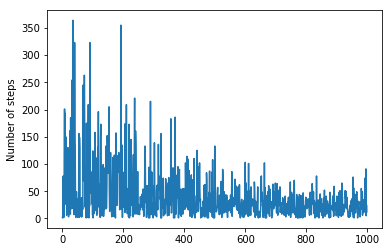

[['r' 'r' 'r' 'r' 'r' 'r' 'r' 'l']
 ['r' 'r' 'u' 'r' 'u' 'u' 'u' 'u']
 ['u' 'u' 'u' 'u' 'r' 'r' 'u' 'l']
 ['r' 'u' 'u' 'u' 'r' 'u' 'u' 'u']
 ['u' 'u' 'u' 'u' 'r' 'u' 'u' 'u']
 ['r' 'r' 'u' 'u' 'l' 'u' 'u' 'u']
 ['u' 'u' 'u' 'u' 'r' 'u' 'u' 'u']
 ['u' 'u' 'u' 'r' 'r' 'r' 'r' 'u']]
Time: 8.587948083877563


In [86]:
start = time.time()
steps = learningAgent([7,0], world, rewardGrid, utilities)
end = time.time()
plt.plot(steps)
plt.ylabel('Number of steps')
plt.show()

evaluate(world, utilities, [0,0], rewardGrid)
print("Time:", end - start)